In [2]:
# 데이터 임포트
# housewarming2 : 커뮤니티 - 집들이 게시글 스크래핑 (2020.01 ~ 2022.10)
# hou_prd_details : 게시글 내 태깅된 상품 데이터

import pandas as pd
df_hw = pd.read_csv('housewarming2.csv')
df_prd = pd.read_csv('hou_prd_details.csv')

In [3]:
df_hw.head()

,id,작성일,제목,가족형태,공간,평수구간,스타일,세부공사,분야,작업,예산,조회,스크랩,좋아요,댓글,url
0,0,2022-10-07,서재형 거실부터 베란다 아뜰리에까지! 센스만점 오베네홈,아기가 있는 집,아파트,35,내추럴,0,리모델링,전문가,0,10513,136,57,15,https://ohou.se/projects/126917/detail?affect_...
1,1,2022-10-07,"구축 2Bay 리모델링의 바이블, 모던한 32평 신혼집",신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문, 가벽&파티션, 슬라이딩도어",리모델링,전문가,4200,5610,75,26,12,https://ohou.se/projects/126600/detail?affect_...
2,2,2022-10-07,취향을 읽고 쓰는 비밀 서재처럼- 푸릇푸릇 3평 방,부모님과 함께 사는 집,기타,5,내추럴,0,홈스타일링,셀프•DIY,0,4214,201,60,15,https://ohou.se/projects/123056/detail?affect_...
3,3,2022-10-07,손 뻗으면 닿을 듯한 녹음🌳 싱그러운 저층집 리모델링,신혼부부,아파트,35,모던,"주방리모델링, 조명시공, 중문",리모델링,전문가,5500,37375,643,169,122,https://ohou.se/projects/116945/detail?affect_...
4,4,2022-10-07,아늑하고 편안한 무드로- 빈티지 한 스푼 더한 내추럴홈,신혼부부,아파트,55,내추럴,"주방리모델링, 중문",리모델링,전문가,9500,3760,73,13,9,https://ohou.se/projects/127436/detail?affect_...


In [5]:
df_prd = df_prd.drop(columns=['Unnamed: 0'], axis=1)
df_prd.head()

,id,상품url,브랜드명,상품명,카테고리,상품가격,리뷰수,스크랩수,스타일링샷수
0,0,https://ohou.se/productions/538782/selling,에어론,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),"['가구', '테이블·식탁·책상', '책상', '일반책상']",39800.0,2891.0,57140.0,2113.0
1,0,https://ohou.se/productions/803775/selling,베네베네,벤트라이크 멀티플 접이식 세발자전거+안전가드,"['유아·아동', '완구·교구', '공간·대형완구']",94800.0,1.0,60.0,1.0
2,0,https://ohou.se/productions/1068049/selling,플렌스테드,FLENSTED MOBILES 모빌 - 천사 Angel mobile,"['데코·식물', '인테리어소품', '모빌·가랜드']",37400.0,NaN,81.0,0.0
3,0,https://ohou.se/productions/580038/selling,잠솔솔,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,"['패브릭', '베개·베개커버', '폼베개']",38900.0,32.0,78.0,13.0
4,0,https://ohou.se/productions/961600/selling,리스,리스 클래식 법랑 양수냄비 22cm(H),"['주방용품', '냄비·프라이팬·솥', '냄비·뚝배기']",135000.0,1.0,89.0,1.0


In [6]:
df_prd_style = df_prd[['id', '상품명']].merge(df_hw[['id', '스타일']], how = 'left', on = 'id')
df_prd_style

,id,상품명,스타일
0,0,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),내추럴
1,0,벤트라이크 멀티플 접이식 세발자전거+안전가드,내추럴
2,0,FLENSTED MOBILES 모빌 - 천사 Angel mobile,내추럴
3,0,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,내추럴
4,0,리스 클래식 법랑 양수냄비 22cm(H),내추럴
...,...,...,...
243014,4691,악세스시리즈01 한정판 아트포스터,유니크&믹스매치
243015,4691,[해외]Sand Rug 01,유니크&믹스매치
243016,4691,Pale Nulle,유니크&믹스매치
243017,4691,FROSTA 스툴 3colors,유니크&믹스매치


In [10]:
# 상품별 태깅된 집들이 게시글 스타일(분위기) 확인
df_prd_style[:][df_prd_style['상품명']=='그레이 샌드 세라믹 오브제 화병']

,id,상품명,스타일
1125,17,그레이 샌드 세라믹 오브제 화병,모던
1142,17,그레이 샌드 세라믹 오브제 화병,모던
9630,137,그레이 샌드 세라믹 오브제 화병,유니크&믹스매치


In [5]:
# 중복값 찾기
df_prd_style[df_prd_style.duplicated()]

,id,상품명,스타일
1142,17,그레이 샌드 세라믹 오브제 화병,모던
9264,133,Late Bloomer Vase (Natural),프렌치&프로방스
11405,162,BALUNGEN 더블후크,빈티지&레트로
18675,270,Vintage wood ball multi plug 빈티지 우드볼 멀티탭,모던
22679,332,바위 돌 모양 세라믹 화병,모던
...,...,...,...
233589,4372,모카 에스프레소 커피메이커 1컵~9컵,미니멀&심플
236215,4456,붙이는 욕실 화장실 김서림방지 김안서리는 면도기 거울 2type,0
239587,4569,"GALERIE MAEGHT, GEORGES BRAQUE, RENE CHAR EXPO...","북유럽, 빈티지&레트로"
239756,4577,페이크 퍼 쿠션 커버,북유럽


In [11]:
# 중복값 제거하기
df_prd_style = df_prd_style.drop_duplicates()
df_prd_style

,id,상품명,스타일
0,0,리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),내추럴
1,0,벤트라이크 멀티플 접이식 세발자전거+안전가드,내추럴
2,0,FLENSTED MOBILES 모빌 - 천사 Angel mobile,내추럴
3,0,경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,내추럴
4,0,리스 클래식 법랑 양수냄비 22cm(H),내추럴
...,...,...,...
243014,4691,악세스시리즈01 한정판 아트포스터,유니크&믹스매치
243015,4691,[해외]Sand Rug 01,유니크&믹스매치
243016,4691,Pale Nulle,유니크&믹스매치
243017,4691,FROSTA 스툴 3colors,유니크&믹스매치


In [17]:
# 상품별 스타일 확인1
df_prd_style[df_prd_style['상품명'] == '리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors)']['스타일']

0       내추럴
7458    내추럴
Name: 스타일, dtype: object

In [19]:
# 상품별 스타일 확인2
df_prd_style[df_prd_style['상품명'] == 'FLENSTED MOBILES 모빌 - 천사 Angel mobile']['스타일']

2    내추럴
Name: 스타일, dtype: object

In [22]:
df_prd_style['상품명'].unique()

array(['리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors)',
       '벤트라이크 멀티플 접이식 세발자전거+안전가드',
       'FLENSTED MOBILES 모빌 - 천사 Angel mobile', ...,
       'HUSVIKA 후스비카 스프링매트리스 603.188.64', '악세스시리즈01 한정판 아트포스터 ',
       '[해외]Sand Rug 01'], dtype=object)

In [24]:
len(df_prd_style['상품명'].unique()) 
# 중복 제거하고 집들이 컨텐츠에 태깅된 상품 개수 100,103개

100103

In [25]:
styles = ['모던', '미니멀&심플', '내추럴', '북유럽', '빈티지&레트로', '클래식&앤틱', 
         '프렌치&프로방스', '러블리&로맨틱', '인더스트리얼', '한국&아시아', '유니크&믹스매치']

In [27]:
# 상품별 게시글 분위기별 태깅 횟수 체크할 더미변수 데이터프레임 생성
df_style_dummies = pd.DataFrame(index = df_prd_style['상품명'].unique(), columns = styles)
df_style_dummies = df_style_dummies.fillna(0)
df_style_dummies

,모던,미니멀&심플,내추럴,북유럽,빈티지&레트로,클래식&앤틱,프렌치&프로방스,러블리&로맨틱,인더스트리얼,한국&아시아,유니크&믹스매치
리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),0,0,0,0,0,0,0,0,0,0,0
벤트라이크 멀티플 접이식 세발자전거+안전가드,0,0,0,0,0,0,0,0,0,0,0
FLENSTED MOBILES 모빌 - 천사 Angel mobile,0,0,0,0,0,0,0,0,0,0,0
경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,0,0,0,0,0,0,0,0,0,0,0
리스 클래식 법랑 양수냄비 22cm(H),0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
"[해외]Philips 'Romeo' Table Lamp, 1960s",0,0,0,0,0,0,0,0,0,0,0
실크스크린 아트포스터 3종 Journey Collection 01-03,0,0,0,0,0,0,0,0,0,0,0
HUSVIKA 후스비카 스프링매트리스 603.188.64,0,0,0,0,0,0,0,0,0,0,0
악세스시리즈01 한정판 아트포스터,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# for prd_name in df_style_dummies.index:
#     for prd_style in df_prd_style[df_prd_style['상품명'] == prd_name]['스타일']: # 해당 상품을 태깅한 스타일을 모두 가져옴
#         for style in styles: 
#             if style in prd_style:
#                 df_style_dummies[style].loc[prd_name] += 1

In [ ]:
for prd_name in df_style_dummies.index:
     for prd_style in df_prd_style[df_prd_style['상품명'] == prd_name]['스타일']:  # 해당 상품을 태깅한 스타일을 모두 가져옴
            for style in styles:
                if style in prd_style:
                    df_style_dummies[style].loc[prd_name] += 1
                    
print(df_style_dummies)

In [29]:
df_style_dummies = pd.read_csv('df_style_dummies.csv')
df_style_dummies = df_style_dummies.rename(columns = {'Unnamed: 0' : '상품명'})
df_style_dummies.index = df_style_dummies['상품명']
df_style_dummies = df_style_dummies.drop('상품명', axis = 1)

In [32]:
pd.set_option('display.max_rows', None)
df_style_dummies.head(100)

,모던,미니멀&심플,내추럴,북유럽,빈티지&레트로,클래식&앤틱,프렌치&프로방스,러블리&로맨틱,인더스트리얼,한국&아시아,유니크&믹스매치
상품명,,,,,,,,,,,
리버서블 오피스 데스크 책상/테이블 600~2400mm(2colors),1,1,4,0,1,0,0,1,0,0,0
벤트라이크 멀티플 접이식 세발자전거+안전가드,0,0,1,0,0,0,0,0,0,0,0
FLENSTED MOBILES 모빌 - 천사 Angel mobile,0,0,1,0,0,0,0,0,0,0,0
경추목 메모리폼 숙면 꿀잠 수면 베개_항균탠샐,0,0,1,0,0,0,0,0,0,0,0
리스 클래식 법랑 양수냄비 22cm(H),0,0,1,0,0,0,0,0,0,0,0
PRISA 펜던트등 E26 KS1733D,0,0,1,0,0,0,0,0,0,0,0
LG 디오스 식기세척기 오브제컬렉션 DUBJ2CA 12인용,3,1,7,0,0,0,0,0,0,0,0
[키즈페어] UV-LED 젖병소독기 2colors,3,0,3,0,0,0,0,0,0,0,0
cloud mirror 2,0,0,1,0,0,0,0,0,0,0,0


In [34]:
# 상품 기준으로 분위기별 상관관계 파악
df_style_dummies.corr()

,모던,미니멀&심플,내추럴,북유럽,빈티지&레트로,클래식&앤틱,프렌치&프로방스,러블리&로맨틱,인더스트리얼,한국&아시아,유니크&믹스매치
모던,1.000000,0.711853,0.820646,0.551023,0.544568,0.343380,0.250485,0.369623,0.168131,0.265920,0.519603
미니멀&심플,0.711853,1.000000,0.761679,0.599383,0.542052,0.386971,0.248383,0.384770,0.180451,0.290445,0.455733
내추럴,0.820646,0.761679,1.000000,0.612398,0.672407,0.394986,0.289614,0.458567,0.158323,0.324234,0.545000
북유럽,0.551023,0.599383,0.612398,1.000000,0.511326,0.348272,0.256475,0.348342,0.164518,0.234788,0.455710
빈티지&레트로,0.544568,0.542052,0.672407,0.511326,1.000000,0.465640,0.283345,0.451124,0.182981,0.306239,0.510128
클래식&앤틱,0.343380,0.386971,0.394986,0.348272,0.465640,1.000000,0.273165,0.290070,0.144003,0.211433,0.294807
프렌치&프로방스,0.250485,0.248383,0.289614,0.256475,0.283345,0.273165,1.000000,0.238410,0.085682,0.143276,0.219423
러블리&로맨틱,0.369623,0.384770,0.458567,0.348342,0.451124,0.290070,0.238410,1.000000,0.100096,0.175115,0.337338
인더스트리얼,0.168131,0.180451,0.158323,0.164518,0.182981,0.144003,0.085682,0.100096,1.000000,0.088083,0.163118
한국&아시아,0.265920,0.290445,0.324234,0.234788,0.306239,0.211433,0.143276,0.175115,0.088083,1.000000,0.226682


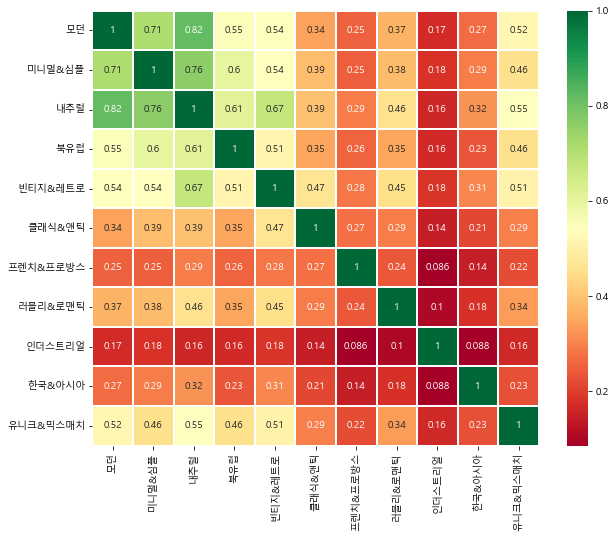

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name)

sns.heatmap(df_style_dummies.corr(), annot = True, cmap = 'RdYlGn', linewidths=0.2)

fig = plt.gcf()             # fig 를 지정
fig.set_size_inches(10,8)   # 그래프 사이즈 조정
plt.show()

# cmap         < 그래프 상관관계성 나타내는 색깔 스타일 지정
# annot = T/F  < 각 cell별로 상관계수값 표시
# cbar = T/F   < colorbar의 유무

- 모던, 미니멀&심플, 내추럴 상관계수가 모두 0.7이상 (상품 간의 경계가 없을 것)